In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

### Import the dataset

In [3]:
wDaysData = pd.read_csv("C:\\Users\\User\\OneDrive\\文档\\Enterprise Information System\\XBIS 2023N Data Science\\Assignment\\Assignment Dataset\\amsterdam_weekdays.csv")

In [4]:
wEndsData = pd.read_csv("C:\\Users\\User\\OneDrive\文档\\Enterprise Information System\\XBIS 2023N Data Science\\Assignment\\Assignment Dataset\\amsterdam_weekends.csv")

### Data Understanding and Preparation

In [5]:
wDaysData.shape

(1103, 20)

In [6]:
wDaysData.size

22060

In [7]:
wEndsData.shape

(977, 20)

In [8]:
wEndsData.size

19540

In [9]:
wDaysData. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [9]:
wEndsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  977 non-null    int64  
 1   realSum                     977 non-null    float64
 2   room_type                   977 non-null    object 
 3   room_shared                 977 non-null    bool   
 4   room_private                977 non-null    bool   
 5   person_capacity             977 non-null    float64
 6   host_is_superhost           977 non-null    bool   
 7   multi                       977 non-null    int64  
 8   biz                         977 non-null    int64  
 9   cleanliness_rating          977 non-null    float64
 10  guest_satisfaction_overall  977 non-null    float64
 11  bedrooms                    977 non-null    int64  
 12  dist                        977 non-null    float64
 13  metro_dist                  977 non

### Merge two files
Our assignment uses two files, first one is the weekdays data, second is weekends data. They all have the same features name, so we merge it into one dataset

In [12]:
def combine(csv_1, col_1, csv_2, col_2):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    merged = pd.concat([csv_1, csv_2])
    
    #Encode week_time column with numerical values
    week_time_dict = {'weekdays': 0, 'weekends': 1}
    le = LabelEncoder()
    merged['week_time'] = le.fit_transform(merged['week_time'])
    
    return merged

# Call combine function
data = combine(wDaysData, 'weekdays', wEndsData, 'weekends')

# Separate features and target variable
X = data.drop('realSum', axis=1) 
y = data['realSum']

In [13]:
data.shape 

(2080, 21)

In [14]:
data.size

43680

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 976
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2080 non-null   int64  
 1   realSum                     2080 non-null   float64
 2   room_type                   2080 non-null   object 
 3   room_shared                 2080 non-null   bool   
 4   room_private                2080 non-null   bool   
 5   person_capacity             2080 non-null   float64
 6   host_is_superhost           2080 non-null   bool   
 7   multi                       2080 non-null   int64  
 8   biz                         2080 non-null   int64  
 9   cleanliness_rating          2080 non-null   float64
 10  guest_satisfaction_overall  2080 non-null   float64
 11  bedrooms                    2080 non-null   int64  
 12  dist                        2080 non-null   float64
 13  metro_dist                  2080 n

In [16]:
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,0
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,0
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,0
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,0
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,0


In [17]:
data.tail()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time
972,972,473.132894,Entire home/apt,False,False,2.0,False,0,0,9.0,...,0,1.911795,1.723938,283.762206,15.023909,351.969002,30.683248,4.86742,52.36629,1
973,973,491.645771,Entire home/apt,False,False,3.0,False,0,0,10.0,...,2,1.478016,1.465641,241.418512,12.782005,312.785000,27.267344,4.88066,52.38412,1
974,974,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,...,5,1.943031,0.388542,257.946814,13.657103,336.589450,29.342520,4.90688,52.35794,1
975,975,399.315727,Entire home/apt,False,False,2.0,False,0,0,9.0,...,1,3.719001,0.882094,156.045916,8.261917,189.962216,16.560145,4.86056,52.34639,1
976,976,728.798069,Entire home/apt,False,False,4.0,True,0,0,10.0,...,2,1.164313,0.454608,426.540426,22.583362,559.122644,48.742073,4.89676,52.36301,1


In [18]:
data.describe() 

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time
count,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,521.408173,573.112795,2.781731,0.283173,0.105288,9.465865,94.514423,1.292308,2.825052,1.089367,269.064730,14.246499,335.712818,26.097566,4.890472,52.364637,0.469712
std,303.576046,430.658406,1.032634,0.450648,0.306999,0.813421,6.350874,0.736683,2.082573,0.831669,195.193411,10.335158,226.473943,17.720931,0.038736,0.018885,0.499202
min,0.000000,128.887118,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.036517,40.890060,2.164941,50.823991,3.545205,4.775500,52.290310,0.000000
25%,259.750000,331.825745,2.000000,0.000000,0.000000,9.000000,92.000000,1.000000,1.349250,0.464639,130.557523,6.913108,165.528716,12.739227,4.870400,52.354565,0.000000
50%,519.500000,460.244183,2.000000,0.000000,0.000000,10.000000,96.000000,1.000000,2.329951,0.861928,208.577946,11.044224,263.073705,20.767760,4.889430,52.365340,0.000000
75%,779.250000,686.441075,4.000000,1.000000,0.000000,10.000000,99.000000,2.000000,3.627072,1.504676,378.208244,20.026378,456.506331,35.437042,4.906743,52.375255,1.000000
max,1102.000000,8130.668104,6.000000,1.000000,1.000000,10.000000,100.000000,5.000000,11.195932,4.411915,1888.737455,100.000000,1435.102401,100.000000,5.010770,52.423480,1.000000


### Visualisation of Data 

#### Countplot

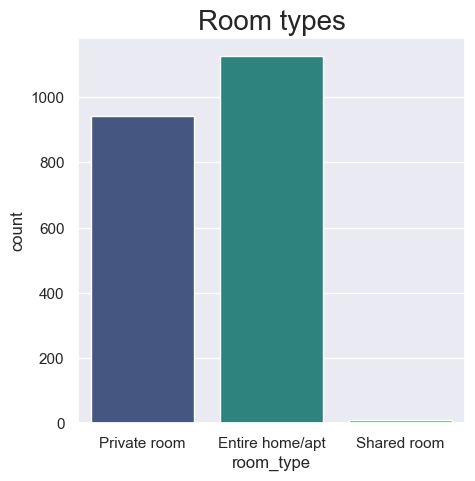

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x=data.room_type, palette = 'viridis')

plt.title('Room types', fontsize = 20)
plt.show()

#### Pie Chart

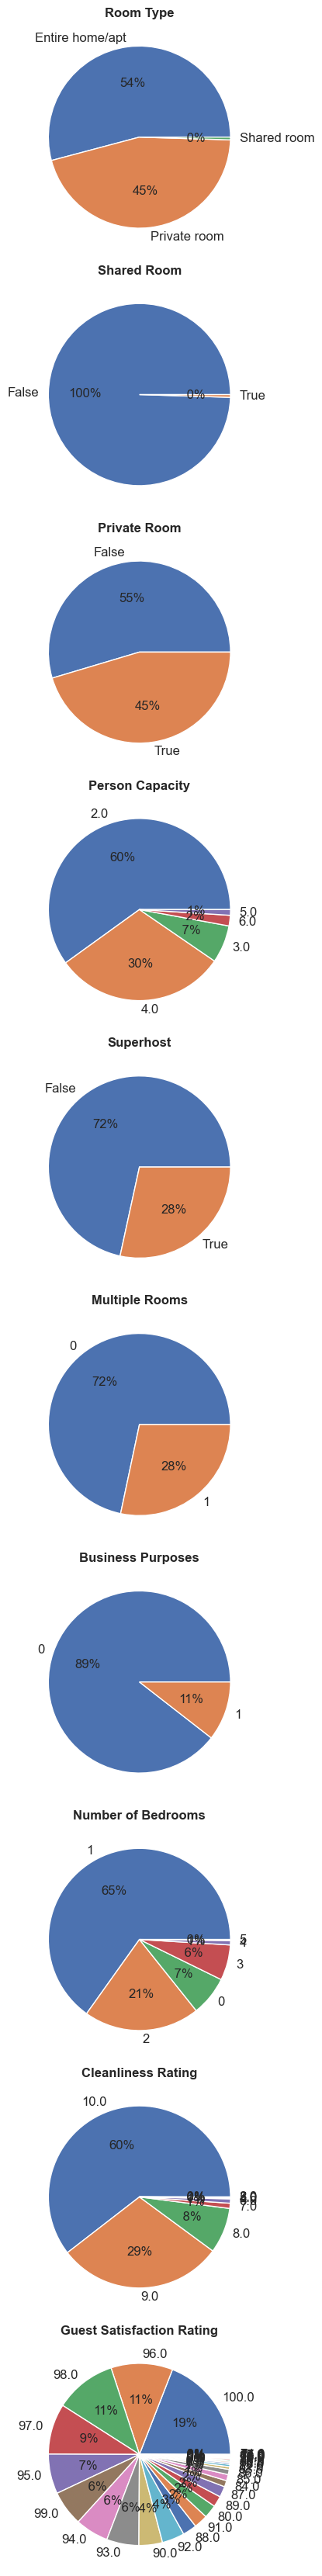

In [18]:
columns = ['room_type', 'room_shared', 'room_private', 'person_capacity',
           'host_is_superhost', 'multi', 'biz', 'bedrooms', 'cleanliness_rating', 'guest_satisfaction_overall']
titles = ['Room Type', 'Shared Room', 'Private Room', 'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business Purposes',
         'Number of Bedrooms', 'Cleanliness Rating', 'Guest Satisfaction Rating']

plt.figure(figsize=(10, 40))

for i, col in enumerate(columns):
    ax = plt.subplot(12, 1, i+1)
    data[col].value_counts().plot.pie(autopct='%2.f%%',textprops={'size':12})
    plt.title(titles[i], fontsize=12, fontweight='bold')
    plt.ylabel(None)
    
plt.tight_layout()
plt.show()

#### Drop the unnamed columns and undefine columns / Add the features
attr_index, atrr_index_norm, rest_index and rest_index_norm 
are not specified in any documentation accompanying the data set. It remains a bit unclear what these features mean, so we will not use them in the analysis. Therefore, we shall remove these 4 features in the next step.

    ***room_type includes the variables, private room, shared room, entire house/apt. In this case, the room_shared, room_private also represent whether they are the shared or private room. In order to make analytics later easier, we are going to create a feature that is named as 'entire_house/apt' and drop the 'room_type'. Therefore, the data visualisation will be easier to understand.***

Further, we can see that there are no non-null counts in the dataset and we have int64, float64, object and boolean datatypes in the dataset.

In [19]:
data['entirehome_apt'] = data['room_type'] == 'Entire home/apt'

In [20]:
data.drop(['attr_index','attr_index_norm', 'rest_index', 'rest_index_norm', 'room_type'], inplace = True, axis=1)

In [21]:
data = data.drop(data.columns[0], axis=1)

In [22]:
data.head(2)

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,week_time,entirehome_apt
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772,0,False
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432,0,False


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 976
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     2080 non-null   float64
 1   room_shared                 2080 non-null   bool   
 2   room_private                2080 non-null   bool   
 3   person_capacity             2080 non-null   float64
 4   host_is_superhost           2080 non-null   bool   
 5   multi                       2080 non-null   int64  
 6   biz                         2080 non-null   int64  
 7   cleanliness_rating          2080 non-null   float64
 8   guest_satisfaction_overall  2080 non-null   float64
 9   bedrooms                    2080 non-null   int64  
 10  dist                        2080 non-null   float64
 11  metro_dist                  2080 non-null   float64
 12  lng                         2080 non-null   float64
 13  lat                         2080 n

### Encode the categorical data
By using the linear regression model, the binary encoding might be a better selection for this case. But we choose to use the target encoding first.

#### Target Encoding

In [24]:
room_shared_dict = {'False': 0, 'True': 1}
encoder = TargetEncoder(cols='room_shared')
data['room_shared'] = encoder.fit_transform(data['room_shared'], data['realSum'])

room_private_dict = {'False': 0, 'True': 1}
encoder = TargetEncoder(cols='room_private')
data['room_private'] = encoder.fit_transform(data['room_private'], data['realSum'])

room_shared_dict = {'False': 0, 'True': 1}
encoder = TargetEncoder(cols='entirehome_apt')
data['entirehome_apt'] = encoder.fit_transform(data['entirehome_apt'], data['realSum'])

#encoder = TargetEncoder(cols='week_time')
#data['week_time'] = encoder.fit_transform(data['week_time'], data['realSum'])

In [25]:
#encoder = TargetEncoder(cols='entireHome/apt')
#data['entireHome/apt'] = encoder.fit_transform(data['entireHome/apt'], data['realSum'])

#encoder = TargetEncoder(cols='host_is_superhost')
#data['host_is_superhost'] = encoder.fit_transform(data['host_is_superhost'], data['realSum'])

#encoder = TargetEncoder(cols='room_type')
#data['room_type'] = encoder.fit_transform(data['room_type'], data['realSum'])


#### Binary Encoding

In [26]:
host_is_superhost_dict = {'False': 0, 'True': 1}
lb = LabelBinarizer()
data['host_is_superhost'] = lb.fit_transform(data['host_is_superhost'])

In [27]:
#data['room_shared'] = lb.fit_transform(data['room_shared'])
#data['room_private'] = lb.fit_transform(data['room_private'])
#data['week_time'] = lb.fit_transform (data['week_time'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 976
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     2080 non-null   float64
 1   room_shared                 2080 non-null   float64
 2   room_private                2080 non-null   float64
 3   person_capacity             2080 non-null   float64
 4   host_is_superhost           2080 non-null   int32  
 5   multi                       2080 non-null   int64  
 6   biz                         2080 non-null   int64  
 7   cleanliness_rating          2080 non-null   float64
 8   guest_satisfaction_overall  2080 non-null   float64
 9   bedrooms                    2080 non-null   int64  
 10  dist                        2080 non-null   float64
 11  metro_dist                  2080 non-null   float64
 12  lng                         2080 non-null   float64
 13  lat                         2080 n

### Visualisation of the data 
#### Scatterplot
Scatterplot will measure the correlation between the variable between one independent variable with dependent variable. This help us to show the strongly correlate of variables, it can shows whether there are a potential outliers or not. If there is a outlier, we have to deal with it later.

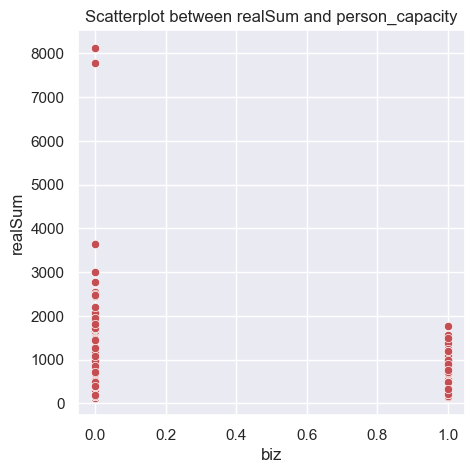

In [29]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'biz', y = 'realSum', data = data, color ='r')

plt.title("Scatterplot between realSum and person_capacity")
plt.show()

In [30]:
data[data.realSum > 2250].loc[:,['realSum','week_time']]

,realSum,week_time
7,2771.307384,0
99,3004.944579,0
133,3637.663159,0
158,2556.183067,0
253,2500.878776,0
271,2458.228857,0
970,7782.907225,0
1098,2486.115342,0
4,2771.541724,1
94,3005.413259,1


In [31]:
median_realSum = data['realSum'].median()
# replace outliers with the median value
outliers = data[(data['realSum'] > 2250)]  # adjust the threshold as needed
data.loc[outliers.index, 'realSum'] = median_realSum

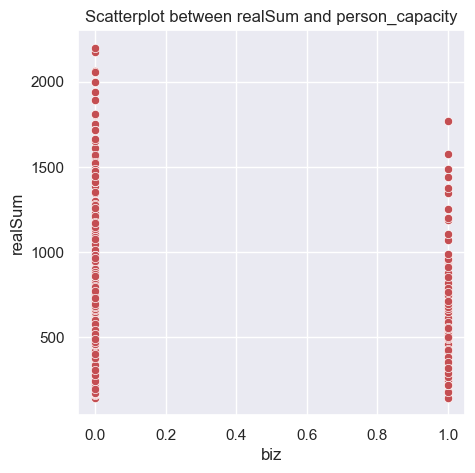

In [32]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = 'biz', y = 'realSum', data = data, color ='r')

plt.title("Scatterplot between realSum and person_capacity")
plt.show()

### Feature Selection
#### Heatmap

<AxesSubplot:>

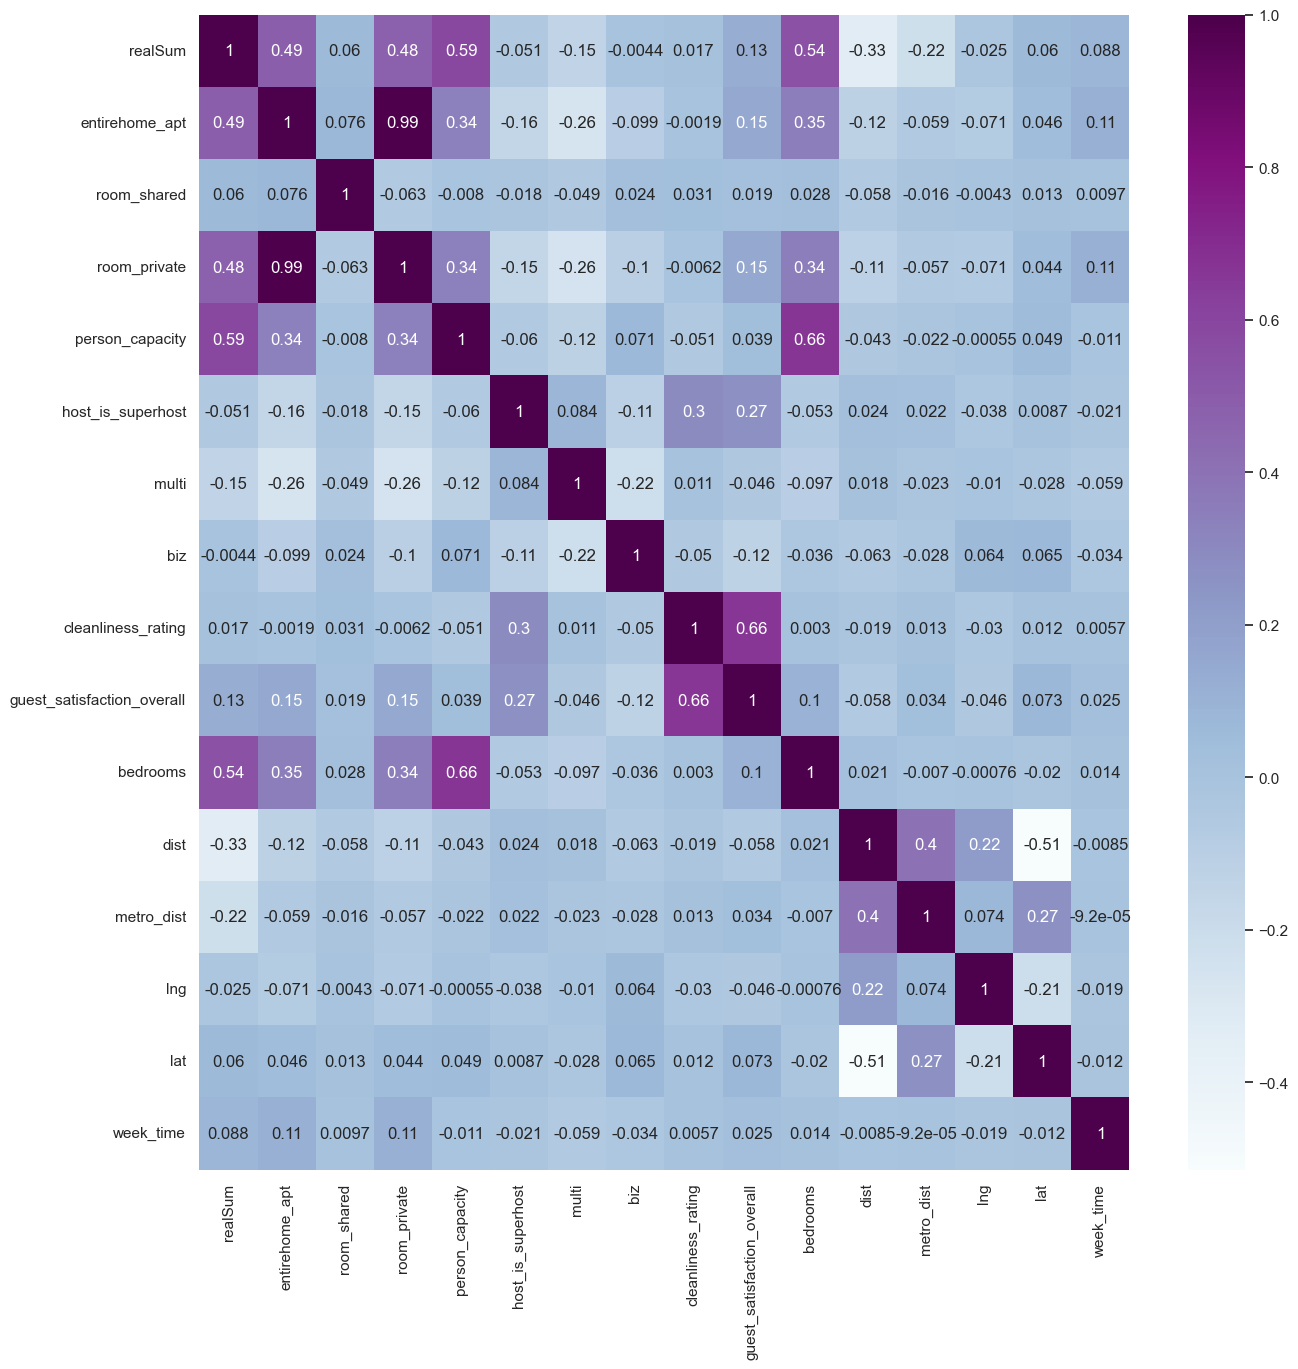

In [33]:
plt.figure(figsize=(15,15))
numeric_columns = ['realSum', 'entirehome_apt', 'room_shared','room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist', 'lng', 'lat', 'week_time']
heatmap_data = data [numeric_columns].corr()

sns.heatmap(heatmap_data,cmap ="BuPu", annot = True)

Based on this countplot, it shows us the correlations among the features. 

Our project mainly focuses on what features will affect the realsum.

***To summarise, the correlations that are indicated on the heatmap are generally met the real-life domain knowledge in terms of the positive and negative correlation. Besides that, from this heatmap we can know, the reasons that affect the realSum are mostly due to the types of room, person capacity and bedrooms quantity although they still have no enough evidence to prove that they significantly affect the prices. It means it might have the other potential reasons. We should find it out.***


    ***Heatmap is NOT suitable for us***

#### OLS Regression Model

#### Drop the features that may not impact the prediction. They will be choosed once the hypothesis is cannot be rejected, which is the features' p-value more than 0.05。 Meanwhile, if the R-squared and Adjusted R-squared is not match, it means still have underlying pattern we havent found that.

In [34]:
data.drop([ 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'metro_dist', 'guest_satisfaction_overall'], inplace = True, axis=1)

In [35]:
y = data['realSum']
X = data[['entirehome_apt', 'room_shared','room_private', 'person_capacity','bedrooms','dist', 'lat', 'week_time' ,'lng'， 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'metro_dist', 'guest_satisfaction_overall']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     337.4
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:31:08   Log-Likelihood:                -14040.
No. Observations:                2080   AIC:                         2.810e+04
Df Residuals:                    2071   BIC:                         2.815e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4056      0.050     

First of all, there are some features can be excluded first. They are
- host_is_superhost

- multi

- biz

- cleanliness_rating

- metro_dist

- guest_satisfaction_overall

#### VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate target variable and predictor variables
y = data['realSum']
X = data.drop(['realSum'], axis=1)

# Fit a multiple regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Calculate VIF values
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a dataframe for VIF
vif_df = pd.DataFrame({'Variable': X.columns, 'VIF': vif}) 

print(vif_df)

          Variable           VIF
0      room_shared  1.071673e+07
1     room_private  6.194538e+05
2  person_capacity  1.846036e+00
3         bedrooms  1.862919e+00
4             dist  1.408229e+00
5              lng  1.068270e+00
6              lat  1.386005e+00
7        week_time  1.016503e+00
8   entirehome_apt  6.034967e+05


In [37]:
data.drop([ 'room_shared','room_private','entirehome_apt'], inplace = True, axis=1)

### Manipulation of data

#### Shuffling the data

In [38]:
shuffled_data = shuffle(data, random_state =100)
X = shuffled_data.drop(['realSum'], axis =1)
y = shuffled_data['realSum']

#### Splitting the data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =100)

In [40]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (1664, 6)
The size of the output train data is: (1664,)
The size of the input test data is: (416, 6)
The size of the output test data is: (416,)


##### Test whether the data is normally distributed

In [41]:
combined = np.array(data).flatten()

# Perform the Shapiro-Wilk test on the combined vector
stat, p = shapiro(combined)

# Print the results
print("Test statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

Test statistic: 0.4480569362640381
p-value: 0.0
The data is not normally distributed.


#### Standardisation of data
The data is not normal distribution

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [43]:
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train_new = scaler.transform(X_train)
#X_test_new = scaler.transform(X_test)

In [44]:
X_train_new.shape

(1664, 6)

### Machine Learning Analysis - Try different type of regression model (At least two type of models)

#### Multi Linear Regression

In [45]:
error_mean_square = []
error_mean_absolute = []
error_mean_absolute_percentage = []

In [46]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [47]:
y_predict = model.predict(X_test_new)

In [48]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_mean_absolute_percentage.append(int(mean_absolute_percentage_error(y_predict, y_test)))

In [49]:
error_mean_absolute

[150]

In [50]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [51]:
y_predict.head()

,Predicted Output
0,197.104864
1,407.997954
2,211.220082
3,662.892182
4,522.351450


In [52]:
y_test.to_frame().head()

,realSum
24,245.588545
538,566.634640
290,356.431467
792,638.811426
757,485.552926


In [53]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis=1, ignore_index = False) ###combine columns together

In [54]:
results.head()

,Predicted Output,realSum
0,197.104864,245.588545
1,407.997954,566.634640
2,211.220082,356.431467
3,662.892182,638.811426
4,522.351450,485.552926


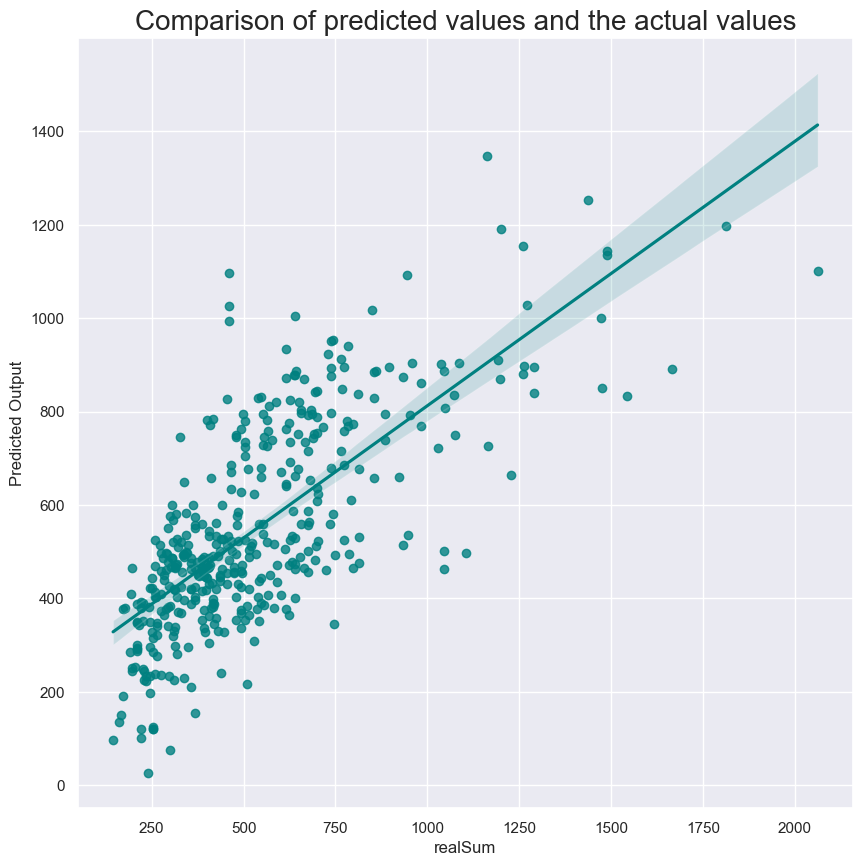

In [55]:
plt.figure(figsize = (10,10))
sns.regplot(data=results, y="Predicted Output", x="realSum", color="teal", marker='o') 
#### y= name listed above in y_predict
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

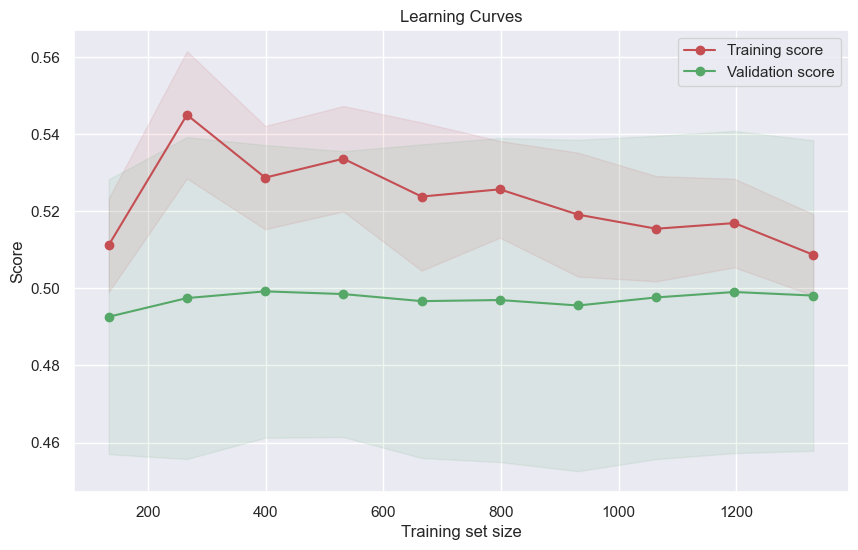

In [56]:
# Define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

Overall, the regression plot of multi linear regression model is quite good for us to use. However, the learning curve means that the model can't learn from the dataset very well. But the train and validation score in an acceptable standard for us.

#### Suppor Vector Regressor

In [57]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis = 1, ignore_index = False)

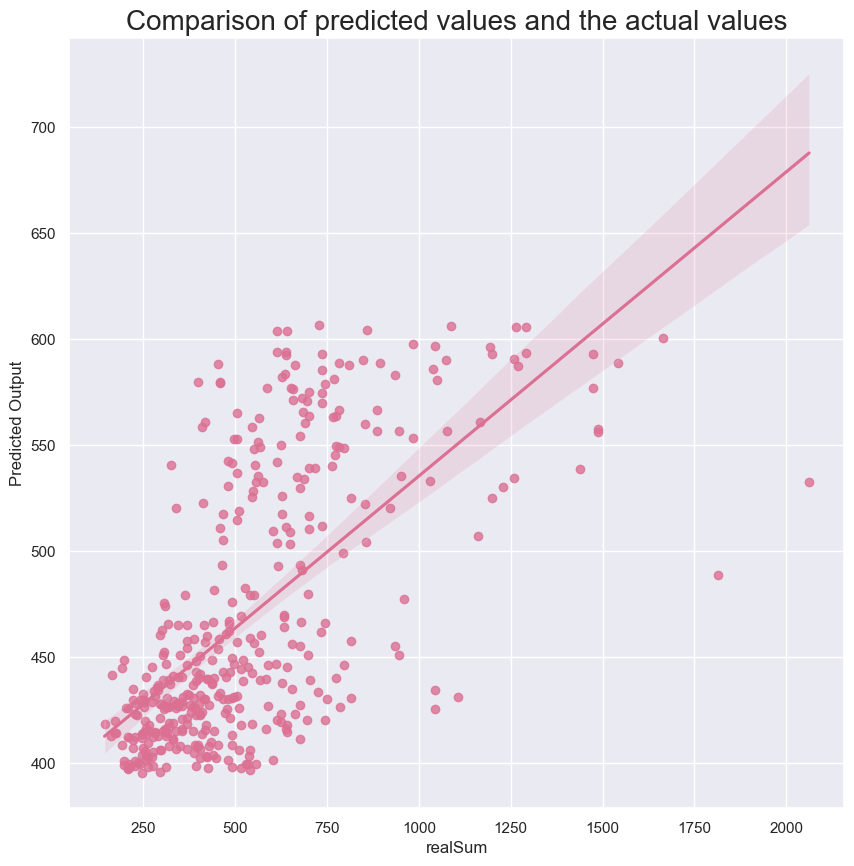

In [58]:
plt.figure(figsize=(10,10))
sns.regplot(data=results, y = 'Predicted Output', x='realSum', color = 'palevioletred', marker = 'o')
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

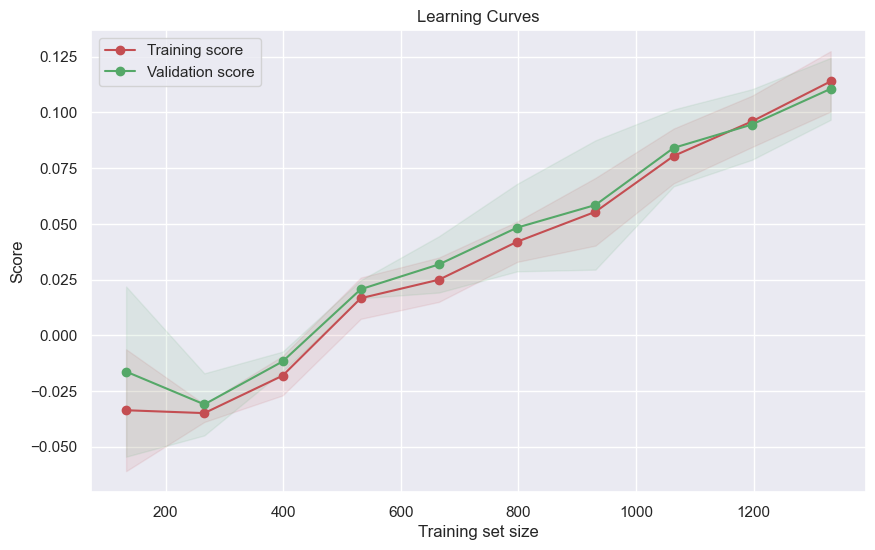

In [59]:
# Define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

SVR has a ideal shape of learning curve, however the predicted value and the actual prices in regression plot is not reasonable. In learning curve, it even has the negative value. But the trend indicates if we can have more data, it may be a good model for our project.

In [60]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))
error_mean_absolute_percentage.append(int(mean_absolute_percentage_error(y_predict, y_test)))

#### K_Neighbor Regressor

In [61]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis = 1, ignore_index = False)

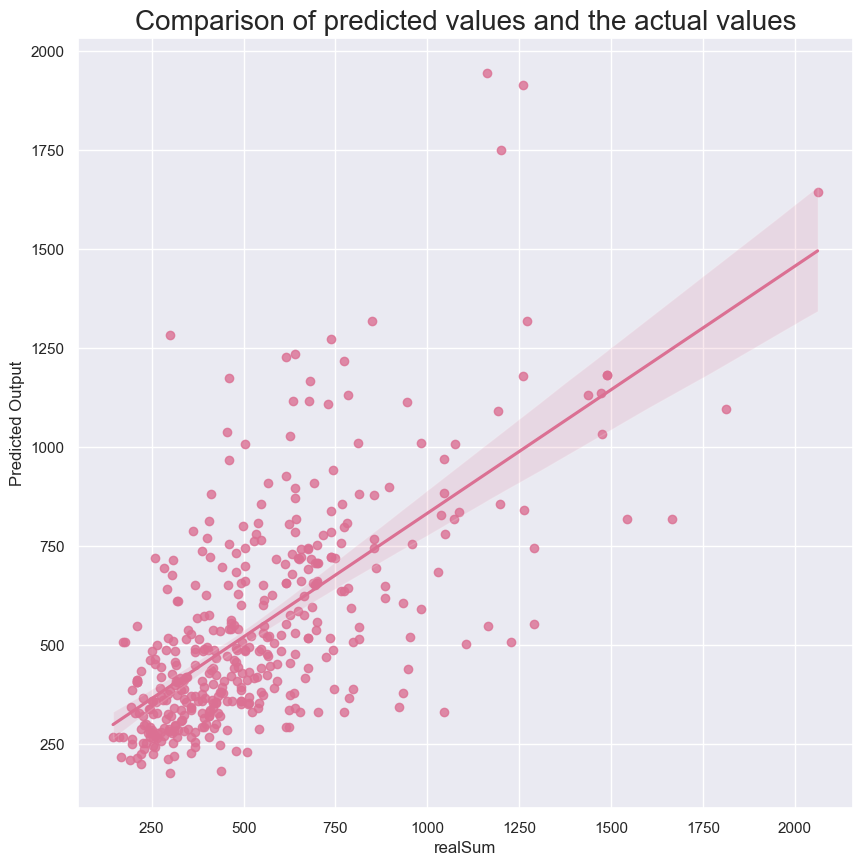

In [62]:
plt.figure(figsize=(10,10))
sns.regplot(data=results, y = 'Predicted Output', x='realSum', color = 'palevioletred', marker = 'o')
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

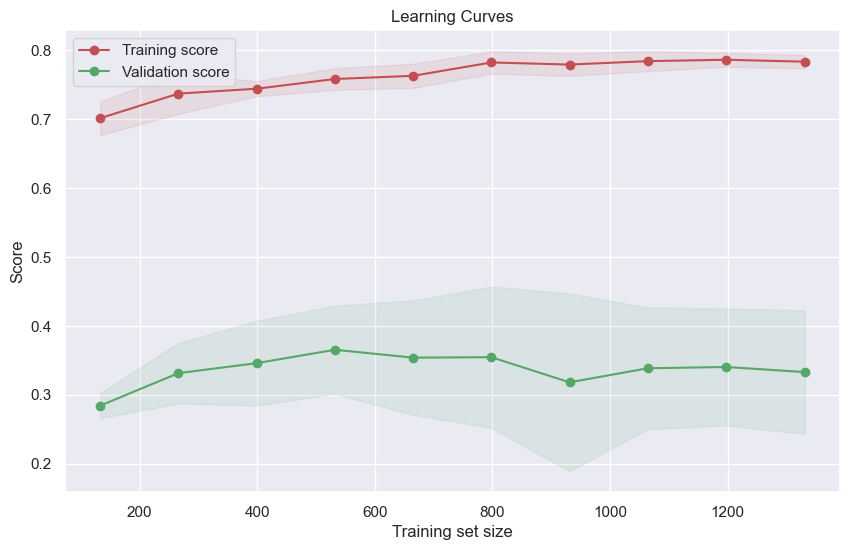

In [63]:
# Define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

The training score and validation score in the learning curve has a big gap. The distribution of data point aroung the regression line also is not good. Therefore, this is not a good model for us to use.

In [64]:
error_mean_square.append (int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append (int(mean_absolute_error(y_predict, y_test)))
error_mean_absolute_percentage.append(int(mean_absolute_percentage_error(y_predict, y_test)))

### PLS Regression

In [65]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis = 1, ignore_index = False)

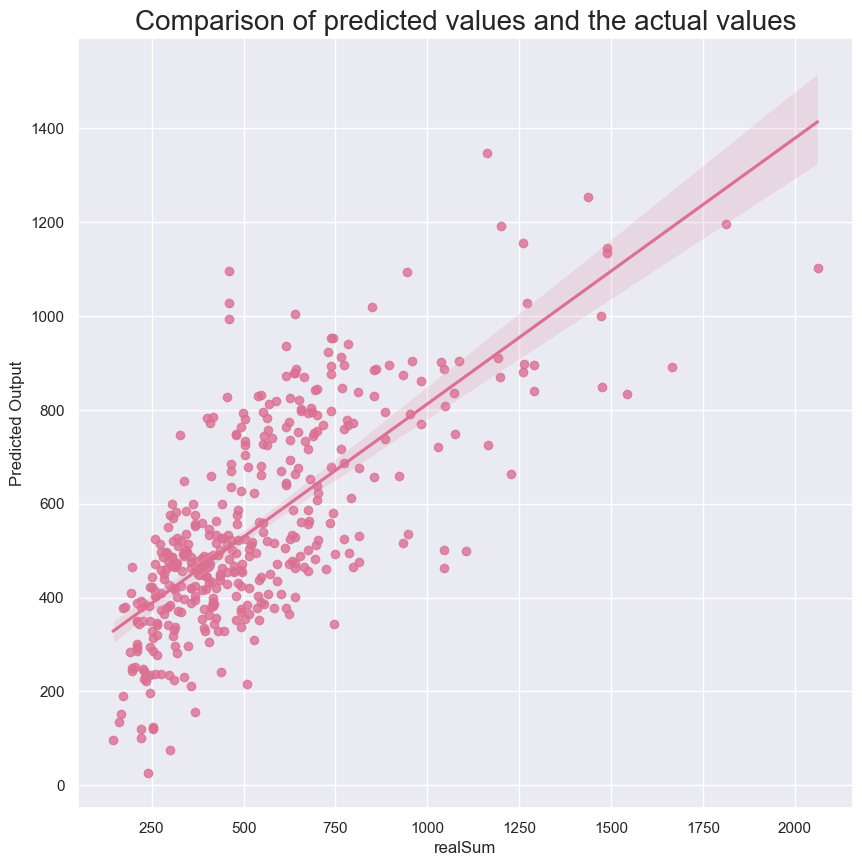

In [66]:
plt.figure(figsize=(10,10))
sns.regplot(data=results, y = 'Predicted Output', x='realSum', color = 'palevioletred', marker = 'o')
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

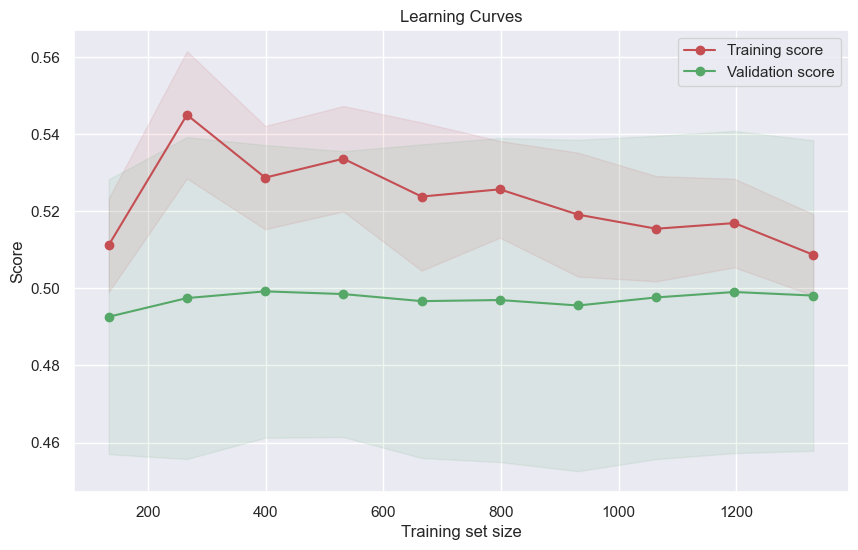

In [67]:
# Define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

In [68]:
error_mean_square.append (int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append (int(mean_absolute_error(y_predict, y_test)))
error_mean_absolute_percentage.append(int(mean_absolute_percentage_error(y_predict, y_test)))

### Decision Tree Regressor

In [69]:
model =DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis = 1, ignore_index = False)

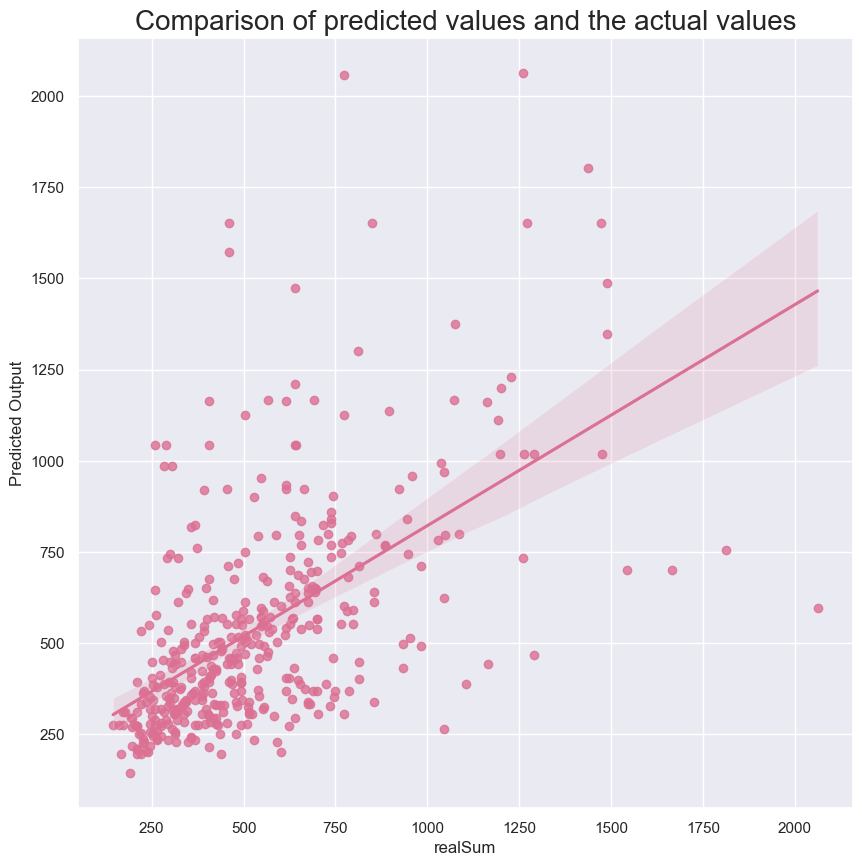

In [70]:
plt.figure(figsize=(10,10))
sns.regplot(data=results, y = 'Predicted Output', x='realSum', color = 'palevioletred', marker = 'o')
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

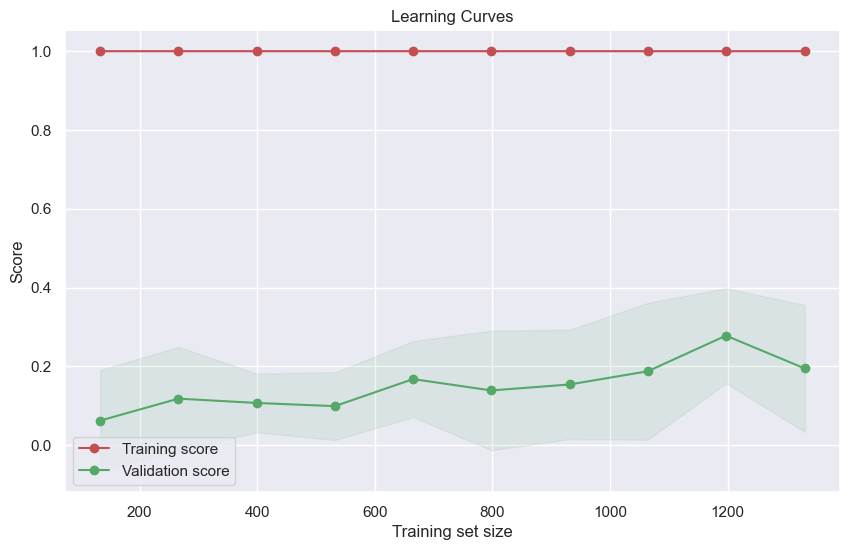

In [71]:
# Define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

From the result of regression model and learning curve, this is not suitable for our project.

In [72]:
error_mean_square.append (int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append (int(mean_absolute_error(y_predict, y_test)))
error_mean_absolute_percentage.append(int(mean_absolute_percentage_error(y_predict, y_test)))

### Gradient Boosting Regressor

In [73]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns =['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop=True)], axis = 1, ignore_index = False)

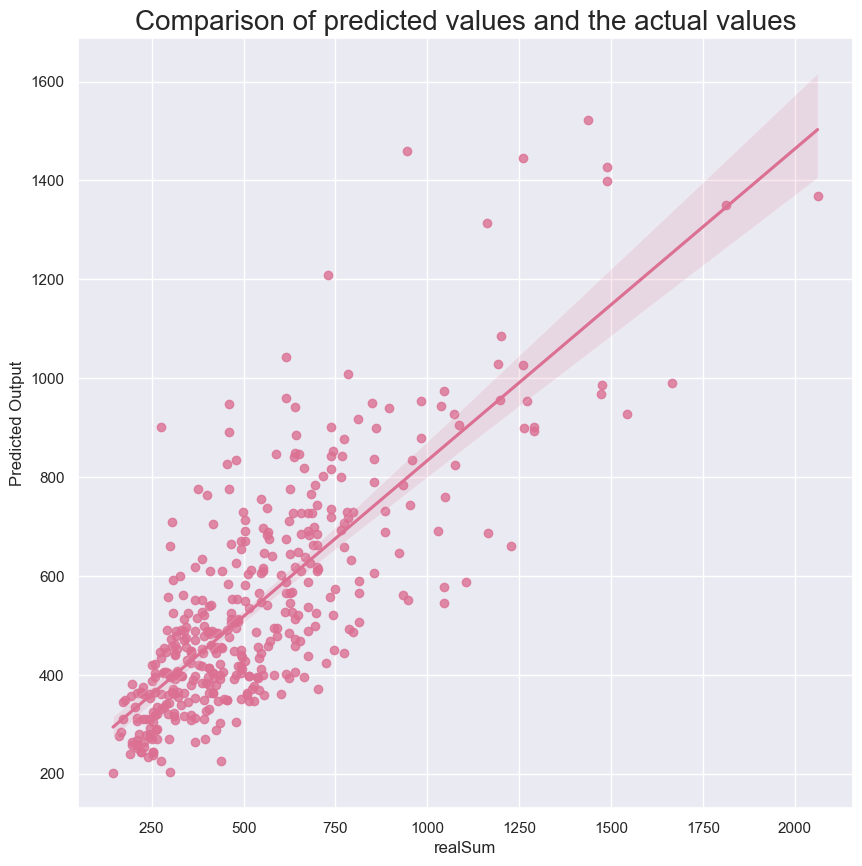

In [74]:
plt.figure(figsize=(10,10))
sns.regplot(data=results, y = 'Predicted Output', x='realSum', color = 'palevioletred', marker = 'o')
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

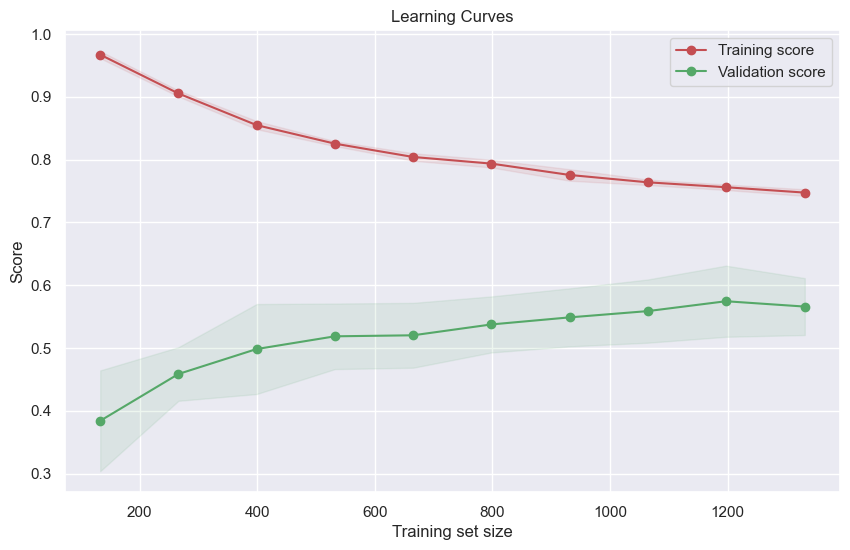

In [75]:
# Define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

In [76]:
error_mean_square.append (int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append (int(mean_absolute_error(y_predict, y_test)))
error_mean_absolute_percentage.append(int(mean_absolute_percentage_error(y_predict, y_test)))

In [77]:
data_model = {'Model': ['Multi Linear Regession', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square, 'MAPE':error_mean_absolute_percentage}
model_dataframe = pd.DataFrame(data_model)

In [78]:
model_dataframe

,Model,Mean Absolute Error,Mean Squared Error,MAPE
0,Multi Linear Regession,150,39110,0
1,Support Vector Regressor,173,67649,0
2,K Nearest Regressor,163,54117,0
3,PLS Regression,150,39110,0
4,Decision Tree Regressor,173,75631,0
5,Gradient Boosting Regressor,131,31520,0


# According to the result of accuracy and learning curves, we may choose the multi linear (the best), Gradient Boosting. 

### Fine Tune the Hyperparameters of Gradient Boosting and Multi Linear model

### Gradient Boosting

In [81]:
# define the hyperparameters to search over
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.75, 1.0],
    'alpha': [0.01, 0.1, 1.0]  # add alpha for L2 regularization
}

# create a Gradient Boosting Regressor object
model = GradientBoostingRegressor()

# create a GridSearchCV object to search over the hyperparameters
grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train_new, y_train)

# print the best hyperparameters found
print(grid_search.best_params_)

# use the best hyperparameters to create a new Gradient Boosting Regressor with L2 regularization
best_model = GradientBoostingRegressor(**grid_search.best_params_)

# fit the new model to the training data
best_model.fit(X_train_new, y_train)

# predict on the test data
y_pred = best_model.predict(X_test_new)

# compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

{'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.75}
MAE: 100.23995543990489
MSE: 23463.802165300505
MAPE: 21.101388863145864


In [82]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_pred = best_model.predict(X_test_new)
y_pred = pd.DataFrame(y_pred, columns =['Predicted Output'])
results = pd.concat([y_pred, y_test.to_frame().reset_index(drop=True)], axis = 1, ignore_index = False)

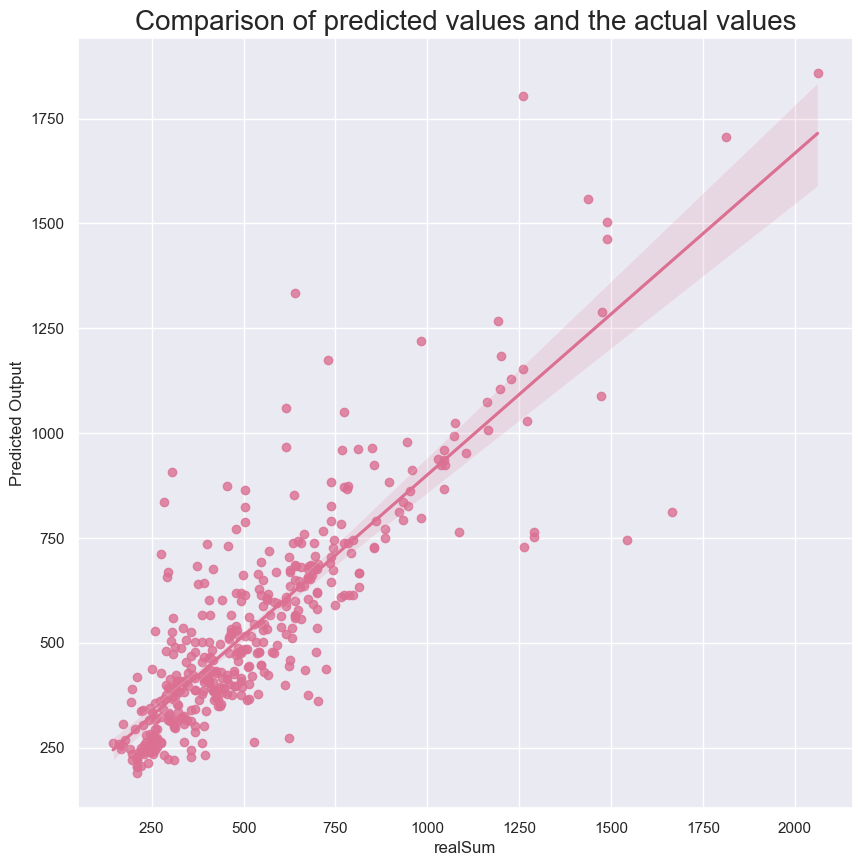

In [83]:
plt.figure(figsize=(10,10))
sns.regplot(data=results, y = 'Predicted Output', x='realSum', color = 'palevioletred', marker = 'o')
plt.title("Comparison of predicted values and the actual values", fontsize = 20)
plt.show()

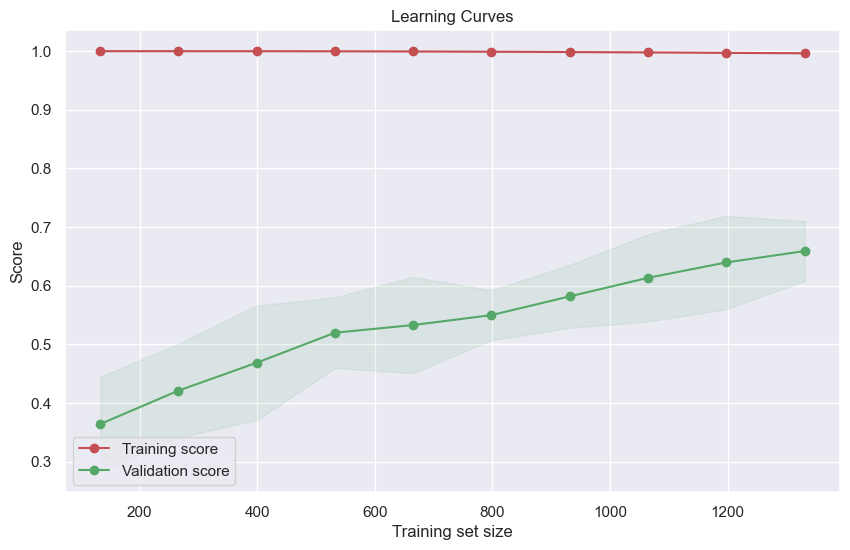

In [84]:
# define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

In [85]:
data_model = {'Model': ['Gradient Boosting Regressor'], 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'MAPE':mape}
model_dataframe = pd.DataFrame(data_model)

In [86]:
model_dataframe

,Model,Mean Absolute Error,Mean Squared Error,MAPE
0,Gradient Boosting Regressor,100.239955,23463.802165,21.101389


Regarding to the result of MAE, MSE, MAPE, they are better then the initial one.

#### Multi Linear Rgeressor

In [87]:
# Create a LinearRegression object
model = LinearRegression()

param_grid = {}

# Step 6: Create a GridSearchCV object to search over the hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Step 7: Fit the GridSearchCV object to the training data
grid_search.fit(X_train_new, y_train)

# Step 8: Use the best hyperparameters to create a new multi linear regression model
best_model = LinearRegression()

# Step 9: Fit the new model to the training data
best_model.fit(X_train_new, y_train)

# Step 10: Evaluate the model performance on the test set
y_pred = best_model.predict(X_test_new)

# compute the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [88]:
# print the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)

MAE: 150.0016631255575
MSE: 39110.787133093814
MAPE: 0.31181387927373344


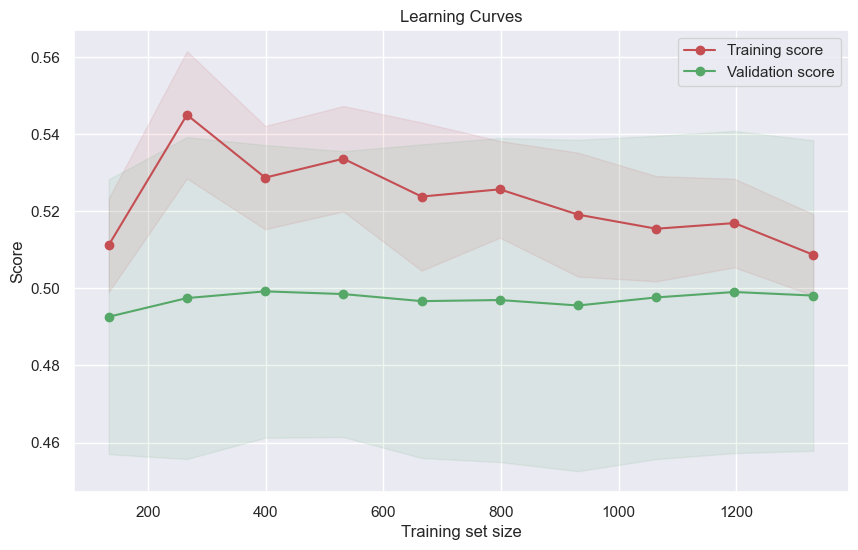

In [89]:
# define the training set sizes for learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_new, y_train, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()

In [92]:
data_model = {'Model': ['Multi Linear Regressor'], 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'MAPE':mape}
model_dataframe = pd.DataFrame(data_model)

In [93]:
model_dataframe

,Model,Mean Absolute Error,Mean Squared Error,MAPE
0,Multi Linear Regressor,150.001663,39110.787133,0.311814
